In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [82]:
image_as_array = mpimg.imread('palm_trees.jpg')

In [83]:
image_as_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

In [84]:
image_as_array.shape

#height,width,color channel

(1401, 934, 3)

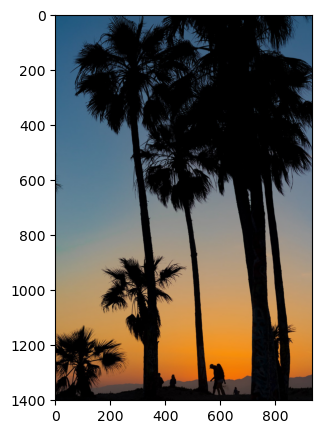

In [85]:
plt.figure(figsize=(5,5))
plt.imshow(image_as_array)

## Using Kmeans to quantize colors 


#### Convert 3D to 2D

In [86]:
h,w,c = image_as_array.shape

In [87]:
image_as_array_2d = image_as_array.reshape(h*w,c)

In [88]:
h*w

1308534

In [89]:
image_as_array_2d.shape

(1308534, 3)

In [90]:
from sklearn.cluster import KMeans

In [91]:
model = KMeans(n_clusters=9)

In [92]:
labels = model.fit_predict(image_as_array_2d)

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [93]:
labels

array([7, 7, 7, ..., 0, 0, 0], dtype=int32)

In [94]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

In [95]:
model.cluster_centers_

array([[  2.56457332,   2.35592186,   3.44222581],
       [174.95641135, 154.46825845, 127.5015173 ],
       [ 57.15512025,  55.00275299,  58.16874905],
       [228.18823954, 135.35295261,  36.22433476],
       [ 90.29948702, 123.61328781, 145.7901386 ],
       [151.17385339,  96.14837319,  58.17597021],
       [135.84241484, 143.84971347, 145.72961636],
       [ 55.882743  ,  95.9396098 , 128.14931775],
       [207.95185366, 153.87145652,  88.89879683]])

In [96]:
rgb_codes = model.cluster_centers_.round(0).astype(int)
rgb_codes

array([[  3,   2,   3],
       [175, 154, 128],
       [ 57,  55,  58],
       [228, 135,  36],
       [ 90, 124, 146],
       [151,  96,  58],
       [136, 144, 146],
       [ 56,  96, 128],
       [208, 154,  89]])

In [97]:
rgb_codes[labels]

array([[ 56,  96, 128],
       [ 56,  96, 128],
       [ 56,  96, 128],
       ...,
       [  3,   2,   3],
       [  3,   2,   3],
       [  3,   2,   3]])

In [98]:
(h,w,c)

(1401, 934, 3)

In [99]:
quantized_image = np.reshape(rgb_codes[labels],(h,w,c))
quantized_image

array([[[ 56,  96, 128],
        [ 56,  96, 128],
        [ 56,  96, 128],
        ...,
        [ 57,  55,  58],
        [ 56,  96, 128],
        [ 56,  96, 128]],

       [[ 56,  96, 128],
        [ 56,  96, 128],
        [ 56,  96, 128],
        ...,
        [ 56,  96, 128],
        [ 56,  96, 128],
        [ 56,  96, 128]],

       [[ 56,  96, 128],
        [ 56,  96, 128],
        [ 56,  96, 128],
        ...,
        [ 56,  96, 128],
        [ 56,  96, 128],
        [ 56,  96, 128]],

       ...,

       [[  3,   2,   3],
        [  3,   2,   3],
        [  3,   2,   3],
        ...,
        [  3,   2,   3],
        [  3,   2,   3],
        [  3,   2,   3]],

       [[  3,   2,   3],
        [  3,   2,   3],
        [  3,   2,   3],
        ...,
        [  3,   2,   3],
        [  3,   2,   3],
        [  3,   2,   3]],

       [[  3,   2,   3],
        [  3,   2,   3],
        [  3,   2,   3],
        ...,
        [  3,   2,   3],
        [  3,   2,   3],
        [  3,   2,   3]]

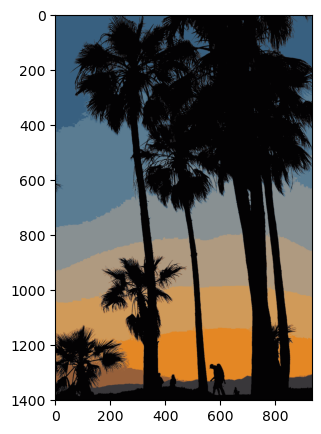

In [100]:
plt.figure(figsize=(5,5))
plt.imshow(quantized_image)